In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('../USGS_transformed2.csv')
pd.set_option('display.max_columns', None)


In [2]:
dataml = data[['mag', 'tsunami', 'type', 'depth', 'dist']]
dataml.dropna(inplace=True)
d = dataml.copy()

C:\Users\FedeGP\AppData\Local\Temp\ipykernel_22640\1251922408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataml.dropna(inplace=True)


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
# from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import joblib

In [4]:
numeric_features = ['mag', 'tsunami', 'depth', 'dist']
numeric_transformer = StandardScaler()

categorical_features = ['type']
categorical_transformer = OneHotEncoder(drop='first', sparse = False)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [6]:


preprocessor.fit(d)
x = preprocessor.transform(d)
joblib.dump(preprocessor, 'pre.pkl', compress=1)

clus_max = 14
K = np.arange(2,clus_max+1)
Sum_of_squared_distances = []

for clus in K:
    km = KMeans(n_clusters=clus, random_state=0)
    km.fit(x)
    etiquetas = km.labels_
    distancia_total = km.inertia_
    distancia_media = np.divide(distancia_total,preprocessor.transform(d).shape[0])
    Sum_of_squared_distances.append(distancia_media)
    print(clus)
    


2
3
4
5
6
7
8
9
10
11
12
13


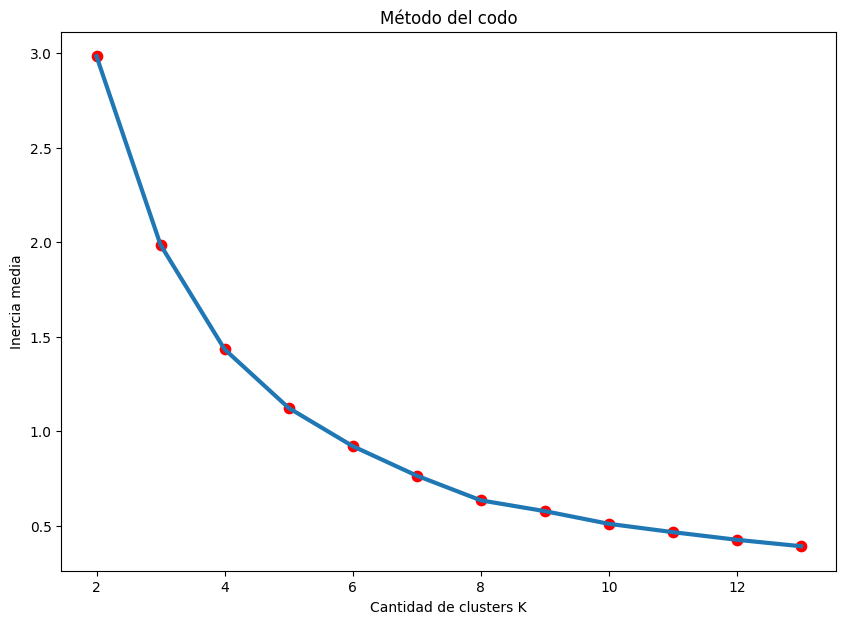

In [7]:
# plotting the results to apply the elbow technique

import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.plot(K, Sum_of_squared_distances, lw=3)
plt.scatter(K, Sum_of_squared_distances,s=55,c='r')
plt.xlabel('Cantidad de clusters K')
plt.ylabel('Inercia media')
plt.title('Método del codo')

plt.show()

In [ ]:
# dump the best selected model due to elbow technique

cluster_elbow = 4

km = KMeans(n_clusters=cluster_elbow, random_state=0)
km.fit(x)
joblib.dump(km, 'km_'+str(cluster_elbow)+'.pkl', compress=1)

In [203]:

# silhouette (tarda años)
# valor_medio_sil = silhouette_score(preprocessor.transform(d), etiquetas)
# print(etiquetas)
# print(clus, valor_medio_sil)
